In [1]:
import os

from matplotlib.font_manager import font_family_aliases

cluster_data_domain = '../data/cluster_info'
if not os.path.exists(cluster_data_domain):
    os.mkdir(cluster_data_domain)
    
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

from model.clustering import moving_norm, cluster_kmeans, agg_cluster_labels
from util.visualize import mean_std_stripe, min_max_stripe

In [2]:
import random

SEED = 0
random.seed(SEED)
np.random.seed(SEED)

In [3]:
df = pd.read_csv('../data/processed/data.csv', index_col=0)
df

,9012,9384,9336,9173,9391,9392,9373,9374,9379,9380,...,9194,9195,9214,9191,9192,9193,9213,9211,9212,9198
2016-02-01,600,112800,52800,406400,764700,472200,72300,89900,51400,54200,...,56600,89100,162900,265700,334700,19800,59100,187100,214500,89200
2016-02-02,504000,84700,29800,172100,670600,518200,37200,88100,58400,64400,...,23600,46600,230500,199200,298000,52800,204800,156800,218600,42500
2016-02-03,467300,47500,10300,526800,60500,17200,269700,260700,167500,288600,...,74700,95900,233700,281600,215900,61500,264500,244400,244000,212300
2016-02-04,382200,11300,55400,532100,77900,61700,258300,227000,146200,196300,...,119100,147000,216100,282900,257000,152900,254200,231300,225000,158900
2016-02-05,298700,268600,99300,522600,282600,205800,284900,209400,206400,151600,...,137600,168900,204400,332400,254100,251000,275600,215800,221900,198500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-27,215100,40200,301000,40600,13300,58500,319200,203700,140500,133300,...,219500,103600,214800,149300,28500,245900,188400,175100,222400,103620
2018-01-28,187800,10200,290200,34900,30800,44500,306200,216600,139600,228500,...,234900,123000,235800,334400,2500,221200,214300,221900,188500,129090
2018-01-29,163500,13000,62600,74700,19800,99000,297100,211600,125600,144000,...,234900,120100,264900,386400,7600,177900,313500,256500,180300,172510
2018-01-30,139000,8300,84000,77200,60400,57300,70000,83700,211400,201400,...,209900,117900,41200,354800,32200,117200,120500,267400,229400,157410


In [4]:
data_norm, avg, std = moving_norm(df, drop_na=True)

In [5]:
df = df[data_norm.columns]
df.shape

(731, 149)

In [6]:
def normalize(s):
	return (s - s.mean()) / s.std() 

In [7]:
features = pd.concat([
	normalize(df.mean().rename('mean')),
	normalize(df.std().rename('std')),
], axis=1).to_numpy()

features

array([[ 2.47591019e-01, -1.00437593e+00],
       [-1.23668073e+00, -1.01961186e+00],
       [-1.17593311e+00, -1.22319967e+00],
       [ 1.41398967e+00,  2.28957824e+00],
       [ 3.71491185e-01,  8.73863514e-01],
       [-5.07307043e-01, -1.80862569e-02],
       [-1.07205280e+00, -1.08799196e+00],
       [-1.18588918e+00, -1.18381824e+00],
       [-4.41162618e-01, -4.27335073e-01],
       [-2.98091143e-01, -3.01784156e-01],
       [-7.09422458e-01, -6.19500992e-01],
       [-8.28890866e-01, -9.72497125e-01],
       [ 1.37701658e+00,  4.59186081e-01],
       [-3.26736959e-02, -1.84663862e-02],
       [ 9.20530275e-02,  1.59804052e-01],
       [ 7.38942382e-01,  1.15382809e+00],
       [-4.48291681e-01, -2.60819874e-02],
       [-1.26635988e+00, -1.48949806e+00],
       [-9.54441949e-01, -8.98905904e-01],
       [ 7.54600819e-01,  7.80738981e-01],
       [-6.13842896e-01,  7.31832951e-02],
       [ 4.57066318e-01,  4.64549181e-01],
       [-9.84624506e-01, -7.20811332e-01],
       [-9.

In [8]:
sil_df, inertia_df, labels_df = cluster_kmeans(
	features,
	k_list=range(2, int(features.shape[0])),
	num_experiment=35,
)

Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
Experiment 10
Experiment 11
Experiment 12
Experiment 13
Experiment 14
Experiment 15
Experiment 16
Experiment 17
Experiment 18
Experiment 19
Experiment 20
Experiment 21
Experiment 22
Experiment 23
Experiment 24
Experiment 25
Experiment 26
Experiment 27
Experiment 28
Experiment 29
Experiment 30
Experiment 31
Experiment 32
Experiment 33
Experiment 34


In [9]:
sil_df

,2,3,4,5,6,7,8,9,10,11,...,139,140,141,142,143,144,145,146,147,148
0,0.544478,0.421344,0.434055,0.403213,0.410681,0.424156,0.428760,0.343486,0.422372,0.391309,...,0.083135,0.071818,0.068438,0.061501,0.056842,0.048775,0.043286,0.035219,0.023828,0.011802
1,0.544478,0.490962,0.432816,0.412911,0.405485,0.324490,0.412518,0.428501,0.348214,0.352078,...,0.083135,0.075155,0.068438,0.061501,0.056842,0.048775,0.038969,0.035219,0.023828,0.011802
2,0.535276,0.427366,0.436032,0.393023,0.404860,0.368196,0.411376,0.430277,0.433008,0.367843,...,0.078536,0.070920,0.064979,0.061599,0.053433,0.047036,0.038969,0.035219,0.023828,0.011802
3,0.544478,0.479133,0.432949,0.399122,0.396056,0.395599,0.416720,0.363152,0.373998,0.328929,...,0.083801,0.075155,0.064881,0.061501,0.056842,0.048775,0.038969,0.035219,0.023828,0.011802
4,0.535276,0.421344,0.434055,0.397452,0.399292,0.333527,0.364105,0.355287,0.324831,0.381788,...,0.078536,0.070792,0.067539,0.061501,0.052155,0.048775,0.038969,0.035219,0.023828,0.011802
5,0.544478,0.427366,0.432308,0.406410,0.406893,0.412108,0.403913,0.352965,0.372445,0.352579,...,0.083135,0.076418,0.068438,0.061501,0.056842,0.048775,0.038969,0.035219,0.023828,0.011802
6,0.535276,0.427850,0.434055,0.387921,0.422196,0.339302,0.441512,0.363441,0.365963,0.400954,...,0.078536,0.075155,0.068438,0.061501,0.053433,0.048775,0.038969,0.035219,0.023828,0.011802
7,0.544478,0.427366,0.434055,0.416428,0.402240,0.340841,0.397105,0.430277,0.367563,0.373582,...,0.083135,0.070792,0.064881,0.060222,0.050416,0.048775,0.038969,0.035219,0.023828,0.011802
8,0.535276,0.461849,0.434055,0.402585,0.412550,0.407821,0.385853,0.361336,0.357096,0.373975,...,0.078536,0.076185,0.064979,0.061501,0.053433,0.048775,0.037383,0.035219,0.023828,0.011802
9,0.535276,0.413372,0.432949,0.402823,0.395931,0.416767,0.332392,0.430277,0.339906,0.384419,...,0.078536,0.074312,0.068438,0.061501,0.053433,0.048775,0.038969,0.035219,0.023828,0.011802


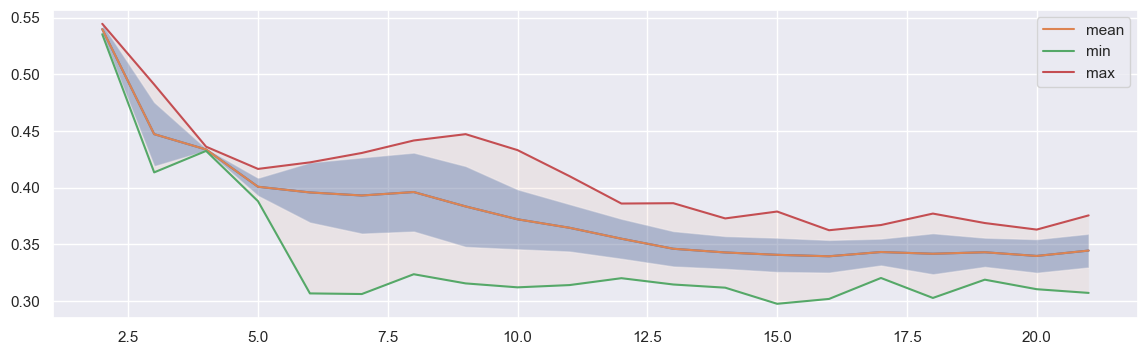

In [10]:
plt.figure(figsize=(14, 4))
mean_std_stripe(sil_df.iloc[:, 0:20])
min_max_stripe(sil_df.iloc[:, 0:20])

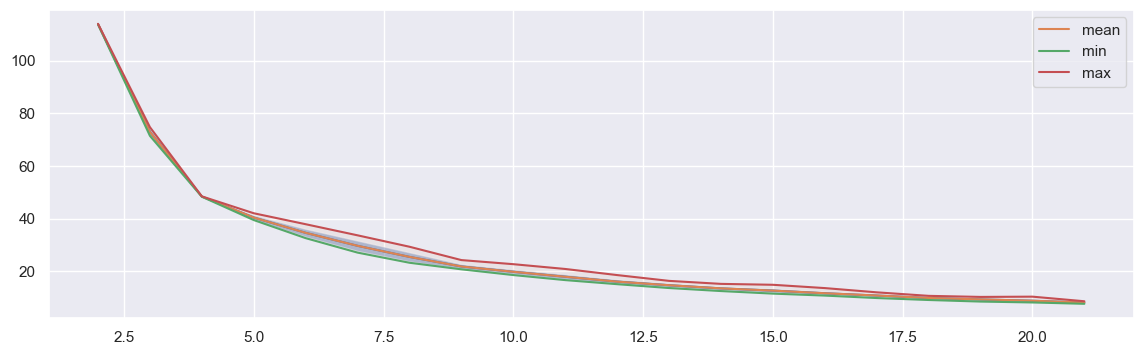

In [11]:
plt.figure(figsize=(14, 4))
mean_std_stripe(inertia_df.iloc[:, 0:20])
min_max_stripe(inertia_df.iloc[:, 0:20])

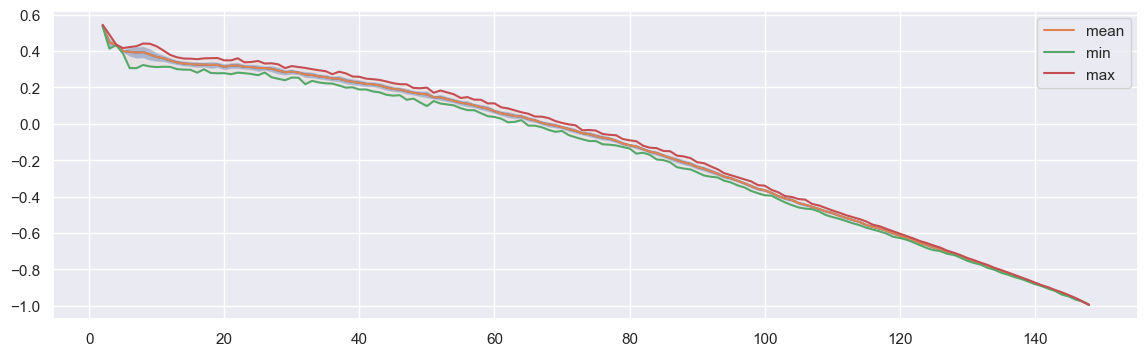

In [12]:
new_sil_df = sil_df.copy()
pos_list = [(i, j) for i in range(new_sil_df.shape[0]) for j in range(new_sil_df.shape[1])]
for (i, j) in pos_list:
	cluster_result = agg_cluster_labels(labels_df.iloc[i, j], label_names=data_norm.columns)
	under_granularity = 0
	for c in cluster_result:
		if len(c) <= 2:
			under_granularity += 1
	new_sil_df.iloc[i, j] -= under_granularity / new_sil_df.shape[1]

plt.figure(figsize=(14, 4))
mean_std_stripe(new_sil_df)
min_max_stripe(new_sil_df)

In [13]:
mean = df[data_norm.columns].mean().rename('mean')
std = df[data_norm.columns].std().rename('std')

In [14]:
row = sil_df[4].argmax()
sil_df.iloc[row, 2], sil_df[4].max()

(0.43603208137372174, 0.43603208137372174)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


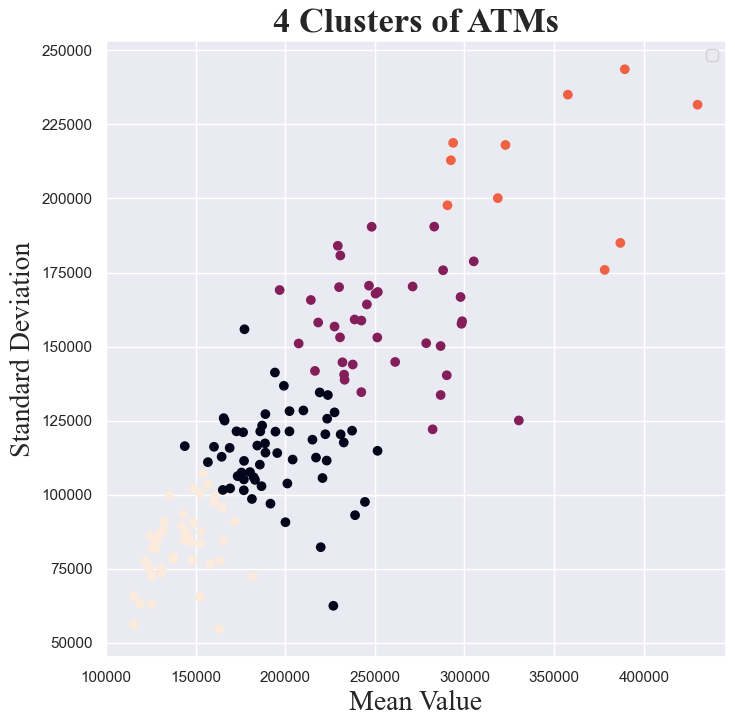

In [15]:
plt.figure(figsize=(8, 8))
plt.title('4 Clusters of ATMs', fontsize=25, fontfamily='Times New Roman', fontweight='bold' )
plt.scatter(mean, std, c=labels_df.iloc[row, 2])
plt.xlabel('Mean Value', fontsize=20, fontfamily='Times New Roman')
plt.ylabel('Standard Deviation', fontsize=20, fontfamily='Times New Roman')
plt.savefig('./cluster_result.png')
plt.legend()
plt.show()

In [17]:
labels_df

,2,3,4,5,6,7,8,9,10,11,...,139,140,141,142,143,144,145,146,147,148
0,"[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...]","[1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, ...]","[2, 0, 0, 3, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 3, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 3, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 3, 3, 1, 2, 3, 2, 1, 0, 0, ...]","[2, 0, 0, 1, 4, 2, 0, 0, 2, 2, 2, 0, 4, 3, 3, 4, 2, 0, 0, 4, 2, 3, 0, 2, 1, 0, 0, 0, 0, 0, 3, 3, 4, 2, 2, 3, 3, 0, 3, 0, 2, 2, 2, 0, 4, 3, 4, 4, 4, 4, 1, 3, 2, 2, 4, 2, 2, 0, 0, 2, 2, 3, 2, 0, 3, 4, 2, 0, 2, 2, 3, 3, 2, 4, 3, 0, 0, 2, 2, 1, 2, 4, 4, 3, 0, 2, 2, 2, 3, 3, 3, 1, 1, 4, 3, 1, 3, 3, 2, 0, ...]","[2, 0, 0, 1, 5, 4, 0, 0, 4, 4, 4, 0, 3, 2, 2, 5, 4, 0, 0, 5, 4, 5, 0, 4, 1, 0, 0, 0, 0, 0, 5, 5, 5, 4, 4, 2, 2, 0, 5, 0, 2, 4, 4, 0, 3, 5, 5, 5, 3, 3, 1, 2, 4, 4, 3, 4, 4, 0, 0, 4, 4, 5, 2, 0, 2, 5, 4, 0, 4, 4, 5, 2, 4, 5, 5, 0, 0, 4, 4, 1, 4, 3, 5, 5, 0, 4, 4, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 3, 4, 0, ...]","[1, 2, 2, 6, 4, 1, 2, 2, 1, 1, 1, 2, 0, 5, 5, 4, 1, 2, 2, 4, 1, 5, 2, 1, 6, 2, 2, 2, 2, 2, 5, 5, 4, 1, 1, 5, 5, 2, 5, 2, 1, 1, 1, 2, 0, 5, 4, 4, 0, 0, 3, 5, 1, 1, 0, 1, 1, 2, 2, 1, 1, 5, 1, 2, 5, 4, 1, 2, 1, 1, 5, 5, 1, 4, 4, 2, 2, 1, 1, 3, 1, 0, 4, 5, 2, 1, 1, 1, 5, 5, 5, 3, 3, 0, 5, 3, 5, 0, 1, 2, ...]","[3, 0, 0, 2, 1, 6, 0, 0, 6, 6, 6, 0, 5, 3, 3, 1, 6, 0, 0, 1, 6, 1, 0, 6, 2, 0, 0, 0, 0, 0, 1, 1, 2, 6, 6, 3, 3, 0, 1, 0, 3, 6, 6, 0, 5, 1, 1, 1, 5, 5, 4, 3, 6, 6, 5, 6, 6, 0, 0, 6, 6, 1, 3, 0, 3, 1, 6, 0, 6, 6, 1, 3, 6, 1, 1, 0, 0, 6, 6, 7, 6, 5, 1, 1, 0, 6, 6, 3, 3, 3, 3, 7, 4, 5, 3, 4, 3, 5, 6, 0, ...]","[5, 0, 0, 7, 4, 2, 0, 0, 2, 2, 8, 0, 1, 2, 6, 4, 2, 0, 0, 4, 2, 6, 8, 8, 7, 0, 0, 8, 0, 0, 6, 6, 4, 8, 2, 5, 5, 0, 6, 0, 5, 8, 2, 0, 1, 6, 4, 4, 1, 1, 3, 5, 8, 2, 1, 2, 2, 0, 8, 2, 2, 6, 5, 8, 5, 4, 2, 0, 2, 8, 6, 5, 2, 4, 6, 0, 0, 8, 2, 7, 2, 4, 4, 6, 0, 8, 2, 5, 5, 5, 5, 7, 3, 1, 6, 3, 5, 1, 8, 0, ...]","[7, 4, 4, 2, 6, 1, 4, 4, 1, 1, 1, 4, 5, 3, 3, 9, 1, 4, 4, 9, 1, 3, 4, 1, 2, 4, 4, 4, 4, 4, 3, 3, 9, 1, 1, 3, 3, 4, 3, 4, 7, 1, 1, 4, 5, 3, 9, 9, 5, 5, 0, 3, 1, 1, 5, 1, 1, 4, 4, 1, 1, 3, 7, 4, 3, 9, 1, 4, 1, 1, 3, 3, 1, 6, 6, 4, 4, 1, 1, 8, 1, 9, 6, 3, 4, 1, 1, 7, 7, 7, 7, 8, 0, 5, 3, 0, 7, 5, 1, 4, ...]","[10, 3, 3, 8, 6, 0, 3, 3, 7, 7, 7, 3, 2, 0, 1, 5, 0, 3, 3, 6, 0, 6, 3, 7, 8, 3, 3, 3, 3, 3, 0, 6, 5, 7, 7, 1, 1, 3, 6, 3, 7, 7, 0, 3, 2, 6, 5, 5, 2, 2, 4, 1, 7, 0, 2, 7, 0, 3, 3, 7, 7, 6, 10, 3, 1, 6, 0, 3, 0, 7, 6, 1, 7, 6, 6, 3, 3, 7, 7, 9, 7, 2, 5, 6, 3, 7, 7, 10, 10, 1, 1, 9, 4, 2, 1, 4, 1, 2, 7, 3, ...]",...,"[36, 33, 90, 28, 111, 131, 57, 90, 130, 102, 135, 62, 39, 50, 99, 66, 75, 25, 71, 56, 41, 138, 104, 40, 63, 57, 128, 109, 33, 53, 93, 61, 51, 19, 95, 83, 126, 100, 2, 89, 84, 97, 34, 116, 60, 29, 49, 10, 80, 6, 35, 7, 67, 41, 22, 3, 105, 134, 76, 92, 45, 77, 46, 30, 27, 65, 125, 115, 136, 81, 123, 96, 120, 14, 72, 18, 127, 124, 137, 54, 9, 38, 42, 110, 70, 121, 82, 11, 88, 112, 73, 12, 5, 13, 119, 15, 16, 17, 103, 32, ...]","[9, 72, 135, 95, 30, 130, 74, 0, 80, 107, 100, 108, 41, 99, 53, 93, 59, 20, 48, 42, 46, 139, 112, 43, 68, 74, 110, 89, 72, 106, 92, 79, 34, 33, 114, 83, 127, 138, 45, 118, 73, 136, 126, 84, 5, 119, 17, 37, 85, 65, 2, 23, 75, 46, 94, 91, 52, 134, 66, 97, 137, 62, 67, 14, 49, 131, 54, 120, 86, 87, 122, 105, 3, 77, 50, 19, 71, 125, 123, 6, 24, 51, 22, 1, 47, 128, 38, 32, 88, 115, 69, 61, 26, 29, 117, 16, 31, 10, 

In [16]:
assert False

AssertionError: 

In [16]:
sil_df

,2,3,4,5,6,7,8,9,10,11,...,139,140,141,142,143,144,145,146,147,148
0,0.544478,0.421344,0.434055,0.403213,0.410681,0.424156,0.428760,0.343486,0.422372,0.391309,...,0.083135,0.071818,0.068438,0.061501,0.056842,0.048775,0.043286,0.035219,0.023828,0.011802
1,0.544478,0.490962,0.432816,0.412911,0.405485,0.324490,0.412518,0.428501,0.348214,0.352078,...,0.083135,0.075155,0.068438,0.061501,0.056842,0.048775,0.038969,0.035219,0.023828,0.011802
2,0.535276,0.427366,0.436032,0.393023,0.404860,0.368196,0.411376,0.430277,0.433008,0.367843,...,0.078536,0.070920,0.064979,0.061599,0.053433,0.047036,0.038969,0.035219,0.023828,0.011802
3,0.544478,0.479133,0.432949,0.399122,0.396056,0.395599,0.416720,0.363152,0.373998,0.328929,...,0.083801,0.075155,0.064881,0.061501,0.056842,0.048775,0.038969,0.035219,0.023828,0.011802
4,0.535276,0.421344,0.434055,0.397452,0.399292,0.333527,0.364105,0.355287,0.324831,0.381788,...,0.078536,0.070792,0.067539,0.061501,0.052155,0.048775,0.038969,0.035219,0.023828,0.011802
5,0.544478,0.427366,0.432308,0.406410,0.406893,0.412108,0.403913,0.352965,0.372445,0.352579,...,0.083135,0.076418,0.068438,0.061501,0.056842,0.048775,0.038969,0.035219,0.023828,0.011802
6,0.535276,0.427850,0.434055,0.387921,0.422196,0.339302,0.441512,0.363441,0.365963,0.400954,...,0.078536,0.075155,0.068438,0.061501,0.053433,0.048775,0.038969,0.035219,0.023828,0.011802
7,0.544478,0.427366,0.434055,0.416428,0.402240,0.340841,0.397105,0.430277,0.367563,0.373582,...,0.083135,0.070792,0.064881,0.060222,0.050416,0.048775,0.038969,0.035219,0.023828,0.011802
8,0.535276,0.461849,0.434055,0.402585,0.412550,0.407821,0.385853,0.361336,0.357096,0.373975,...,0.078536,0.076185,0.064979,0.061501,0.053433,0.048775,0.037383,0.035219,0.023828,0.011802
9,0.535276,0.413372,0.432949,0.402823,0.395931,0.416767,0.332392,0.430277,0.339906,0.384419,...,0.078536,0.074312,0.068438,0.061501,0.053433,0.048775,0.038969,0.035219,0.023828,0.011802


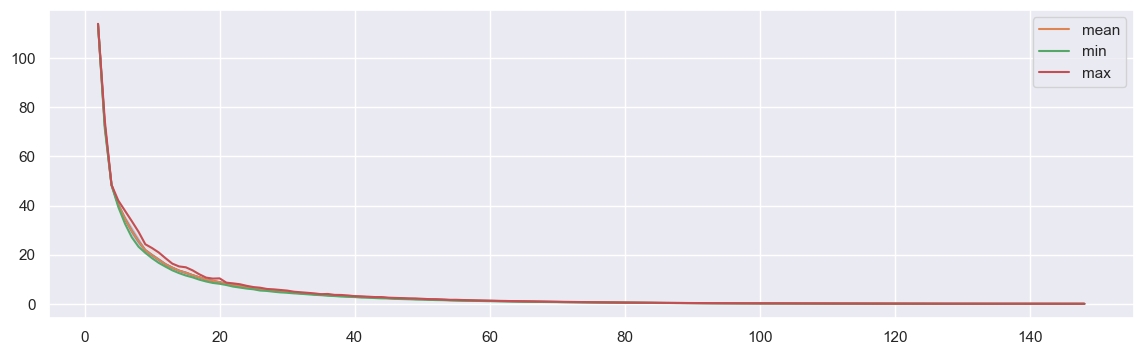

In [17]:
plt.figure(figsize=(14, 4))
mean_std_stripe(inertia_df)
min_max_stripe(inertia_df)

In [18]:
labels = labels_df.iloc[row, 2]
cluster_result = agg_cluster_labels(labels, label_names=data_norm.columns)
print(cluster_result.shape[0])
cluster_result

4


agg clusters
0    [9012, 9256, 9200, 9272, 9060, 9377, 9048, 9333, 9053, 9045, 9008, 9065, 9152, 9084, 9050, 9255, 9083, 9041, 9085, 9124, 9476, 9396, 9123, 9163, 9003, 9339, 9436, 9089, 9472, 9175, 9176, 9042, 9268, 9145, 9230, 9211, 9214, 9392, 9174, 9379, 9380, 9171, 9382, 9410, 9199, 9267, 9178, 9409, 9428, 9239, 9270, 9220, 9206, 9203, 9207, 9341, 9337]
1                                                                                                                            [9025, 9245, 9192, 9191, 9077, 9246, 9091, 9180, 9068, 9254, 9067, 9229, 9253, 9133, 9208, 9166, 9049, 9013, 9490, 9232, 9391, 9459, 9427, 9408, 9440, 9231, 9460, 9202, 9478, 9489, 9519, 9520, 9198, 9338, 9479, 9179, 9397]
2                                                                                                                                                                                                                                                                                              [920

Text(0.5, 0, 'Cluster')

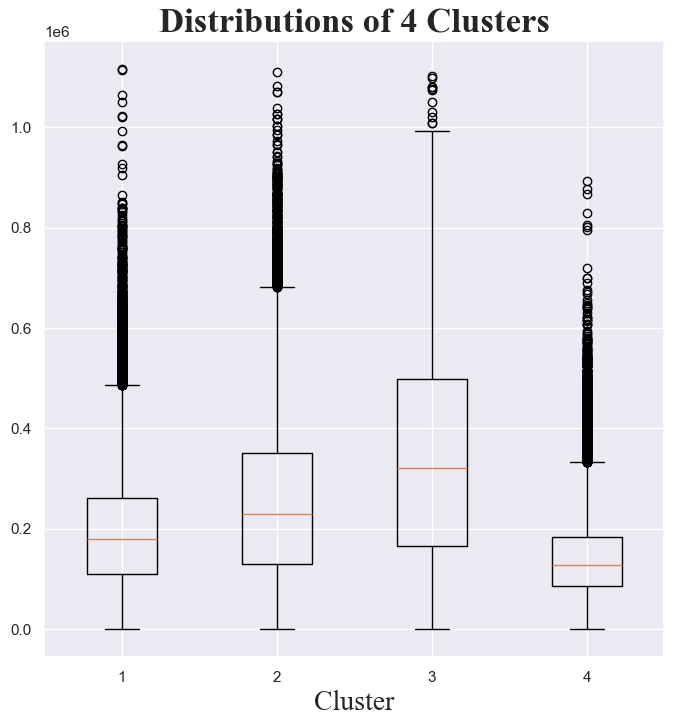

In [40]:
plt.figure(figsize=(8, 8))
plt.boxplot([
	df[cluster_result[0]].to_numpy().flatten(),
	df[cluster_result[1]].to_numpy().flatten(),
	df[cluster_result[2]].to_numpy().flatten(),
	df[cluster_result[3]].to_numpy().flatten(),
])
plt.title('Distributions of 4 Clusters', fontsize=25, fontfamily='Times New Roman', fontweight='bold')
plt.xlabel('Cluster', fontfamily='Times New Roman', fontsize=20)

In [19]:
watch_atm = '9209'

watch_cluster = None
for cluster_id, atm in enumerate(cluster_result):
	if (watch_atm in atm) and (watch_cluster is None):
		watch_cluster = cluster_id
	elif (watch_atm in atm) and (watch_cluster is not None):
		assert False, f'{watch_atm} already in {watch_cluster}, but appears in {cluster_id}'
		
watch_cluster

2

<Axes: >

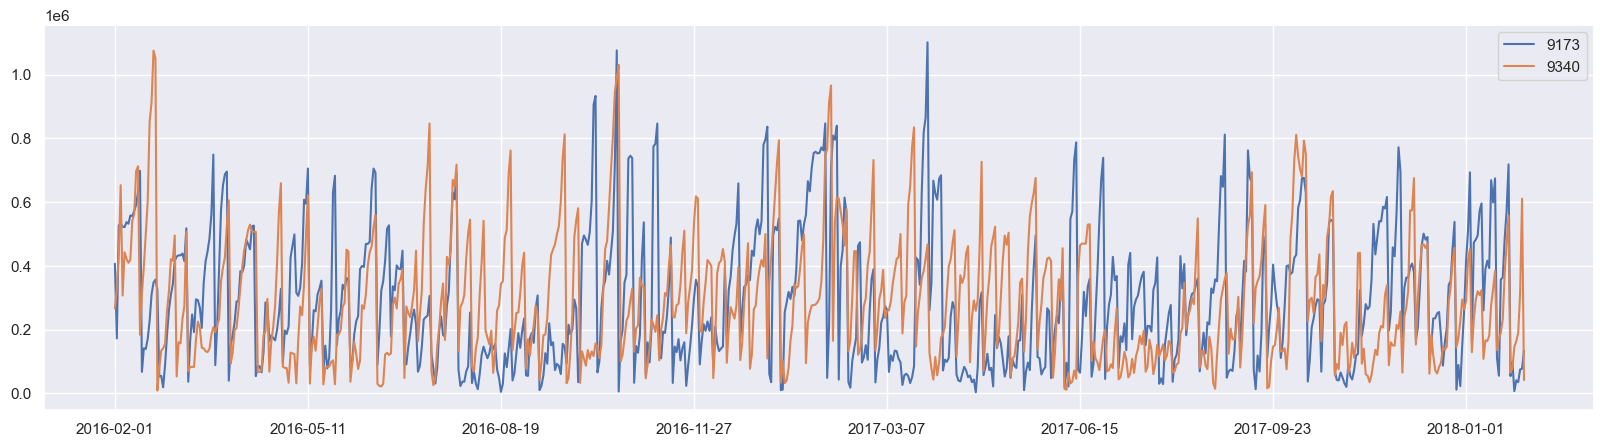

In [20]:
df[cluster_result[watch_cluster][2:4]].plot(figsize=(20, 5))

In [21]:
assert False

AssertionError: 

In [31]:
cluster_result.to_csv('../data/cluster_info/cluster_info_a_s.csv')

In [41]:
df.to_csv('../data/processed/data_filter.csv')